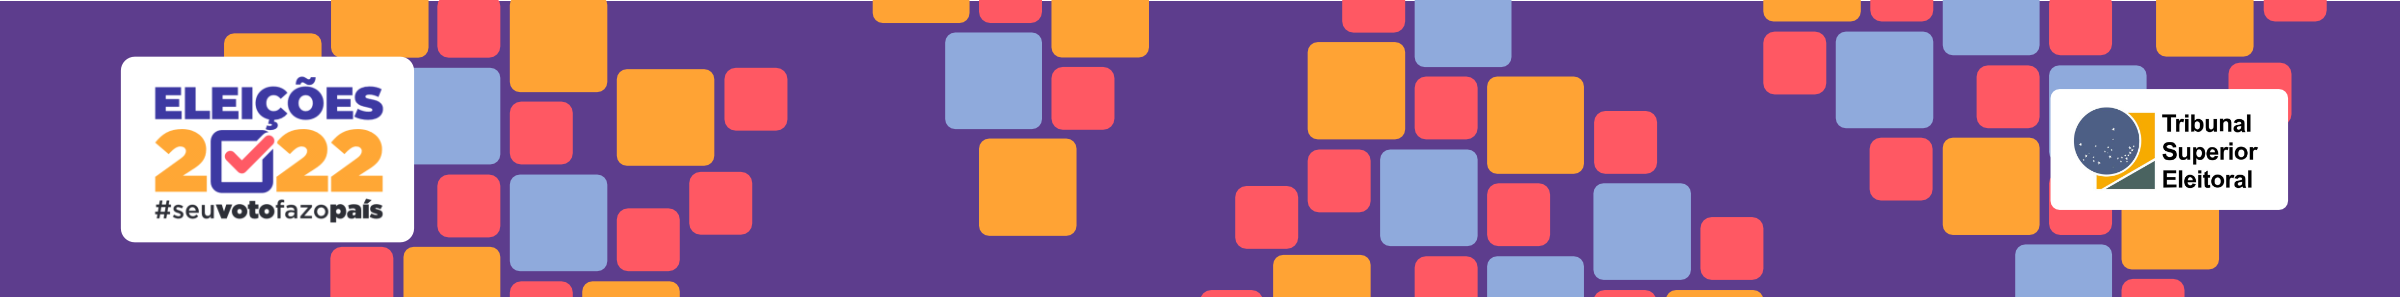
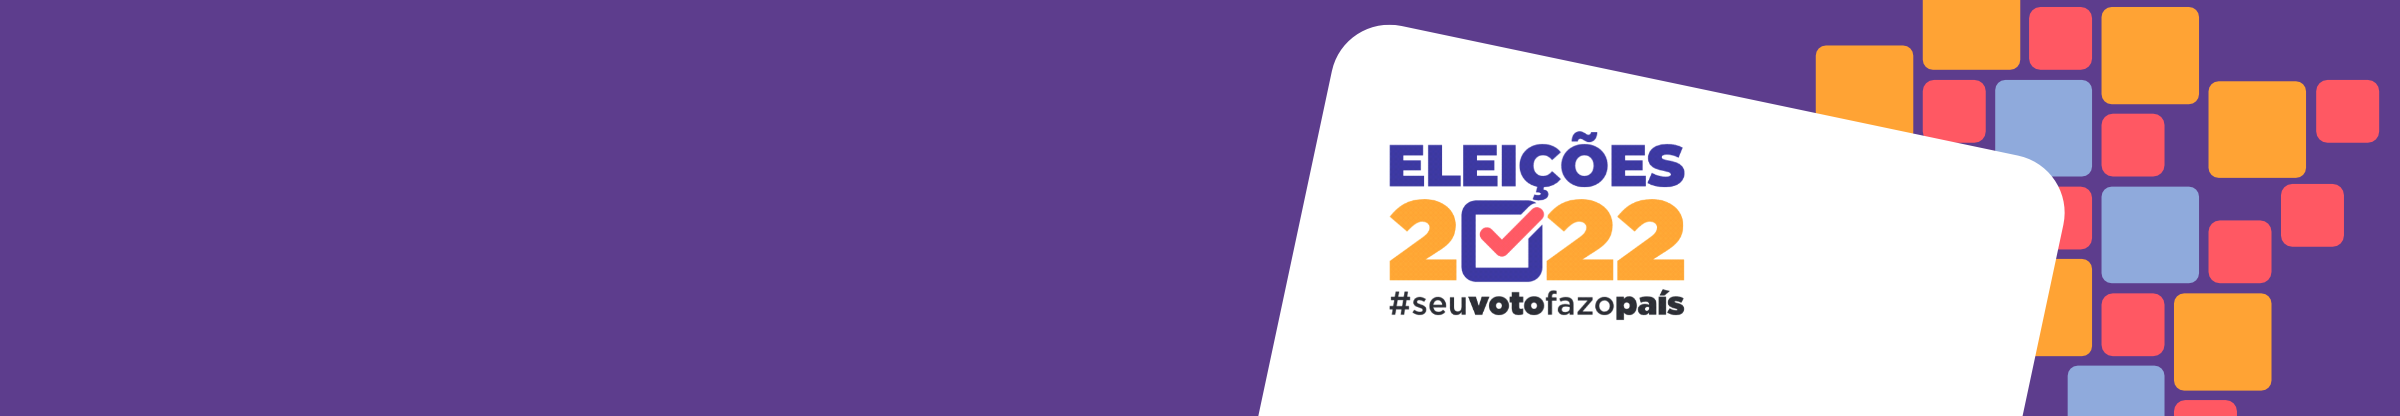

## **Eleições Gerais 2022 no Estado do Tocantins (TO)**

</br> **Trabalho de Análise Exploratória de Dados e Visualização**
</br> **Prof. Sérgio Côrtes**
</br> Aluno: Robson Ricardo Leite da Silva
</br> Matrícula: 2212120015

In [2]:
# Execute o comando "pip install -r requeriments.txt" no terminal para instalar as bibliotecas necessárias para este projeto.

import dash
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

In [3]:
# Carregamento dos dados para um Data Frame do Pandas
eleicao = pd.read_csv('https://raw.githubusercontent.com/jobsrobson/General/main/Public%20Databases/votacao_partido_munzona_2022_TO.csv', sep=';', encoding='latin-1')

### Organização dos Dados

In [4]:
# Substuição de todas as colunas de Código (CD), que estão como int64, para string:
eleicao.loc[:, eleicao.columns.str.contains('CD_')] = eleicao.loc[:, eleicao.columns.str.startswith('CD_')].astype(str)

# Criação de uma nova coluna, denominada 'QT_TOTAL_VOTOS_VALIDOS', que corresponde a soma total dos votos válidos.
eleicao['QT_TOTAL_VOTOS_VALIDOS'] = eleicao['QT_VOTOS_LEGENDA_VALIDOS'] + eleicao['QT_VOTOS_NOMINAIS_CONVR_LEG'] + eleicao['QT_VOTOS_NOMINAIS_VALIDOS'] - eleicao['QT_VOTOS_NOMINAIS_ANUL_SUBJUD'] - eleicao['QT_VOTOS_NOMINAIS_ANUL_SUBJUD']

# Exclusão inicial de algumas colunas que não trazem informações relevantes para a análise:
eleicao = eleicao.drop(['DT_GERACAO', 'HH_GERACAO', 'SG_UE', 'CD_TIPO_ELEICAO', 'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'TP_ABRANGENCIA'], axis=1)

# Visualização das alterações:
eleicao.head()

,ANO_ELEICAO,NR_TURNO,SG_UF,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_CARGO,DS_CARGO,TP_AGREMIACAO,...,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_LEGENDA_VALIDOS,QT_VOTOS_NOMINAIS_CONVR_LEG,QT_TOTAL_VOTOS_LEG_VALIDOS,QT_VOTOS_NOMINAIS_VALIDOS,QT_VOTOS_LEGENDA_ANUL_SUBJUD,QT_VOTOS_NOMINAIS_ANUL_SUBJUD,QT_TOTAL_VOTOS_VALIDOS
0,2022,1,TO,TOCANTINS,73237,TUPIRATINS,6,5,Senador,Federação,...,FEDERAÇÃO,REDE / PSOL,N,0,0,0,0,0,0,0
1,2022,1,TO,TOCANTINS,73288,SÃO BENTO DO TOCANTINS,10,7,Deputado Estadual,Partido isolado,...,PARTIDO ISOLADO,PMB,N,0,0,0,0,0,0,0
2,2022,1,TO,TOCANTINS,73105,SÃO FÉLIX DO TOCANTINS,35,5,Senador,Coligação,...,UNIÃO PELO TOCANTINS,PTB / PSC / PDT / UNIÃO / (PSDB/CIDADANIA) / R...,N,0,0,0,268,0,0,268
3,2022,1,TO,TOCANTINS,73180,SÃO MIGUEL DO TOCANTINS,11,5,Senador,Partido isolado,...,PARTIDO ISOLADO,PSB,N,0,0,0,127,0,0,127
4,2022,1,TO,TOCANTINS,96490,PALMEIRÓPOLIS,18,6,Deputado Federal,Partido isolado,...,PARTIDO ISOLADO,AVANTE,N,4,0,4,48,0,0,52


In [5]:
# Para a tabela de listas, usarei as colunas Ano, Turno, UF, Sigla do Partido, Descrição do Cargo e Total de Votos Válidos.
# Para isso, foi utilizado o método 'groupby', que agrupa os dados de acordo com os parâmetros passados.
tabela_listas = eleicao.groupby(['ANO_ELEICAO', 'NR_TURNO', 'SG_UF', 'SG_PARTIDO', 'DS_CARGO'])['QT_TOTAL_VOTOS_VALIDOS'].sum().reset_index()

# Para exibir um divisor de milhar nos valores do total de votos válidos:
tabela_listas['QT_TOTAL_VOTOS_VALIDOS'] = tabela_listas['QT_TOTAL_VOTOS_VALIDOS'].apply(lambda x: "{:,}".format(x).replace(',', '.'))

# Somar a quantidade de votos válidos por Partido:
tabela_partidos = eleicao.groupby(['SG_PARTIDO'])['QT_TOTAL_VOTOS_VALIDOS'].sum().reset_index()

# Calcular a frequência de DS_Cargo:
tabela_cargos = eleicao['DS_CARGO'].value_counts().reset_index()

# Cria uma lista com os cargos:
cargos = list(eleicao['DS_CARGO'].unique())
cargos.append('Todos os Cargos')

# Cria uma lista com todos os municípios:
municipios = list(eleicao['NM_MUNICIPIO'].unique())
municipios.append('Todos os Municípios')

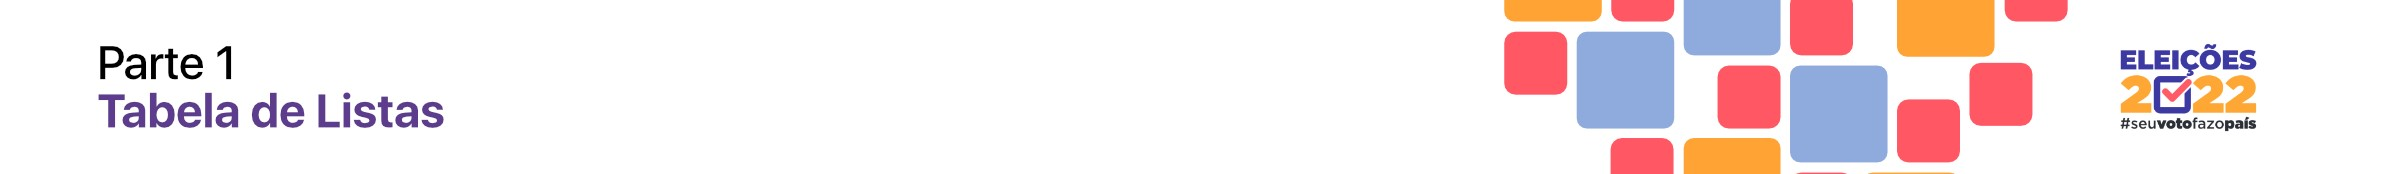
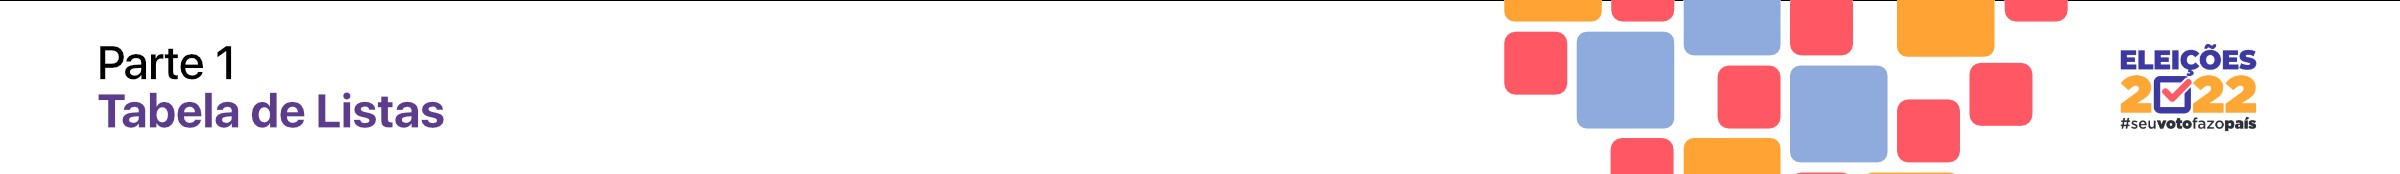

In [6]:
# Visualização da tabela de listas:
tabela_listas.head(60)

,ANO_ELEICAO,NR_TURNO,SG_UF,SG_PARTIDO,DS_CARGO,QT_TOTAL_VOTOS_VALIDOS
0,2022,1,TO,AVANTE,Deputado Federal,6.555
1,2022,1,TO,CIDADANIA,Deputado Estadual,33.356
2,2022,1,TO,CIDADANIA,Deputado Federal,1.940
3,2022,1,TO,DC,Deputado Estadual,291
4,2022,1,TO,DC,Deputado Federal,859
5,2022,1,TO,DC,Governador,1.232
6,2022,1,TO,DC,Senador,-1.176
7,2022,1,TO,MDB,Deputado Estadual,21.744
8,2022,1,TO,MDB,Deputado Federal,47.679
9,2022,1,TO,PATRIOTA,Deputado Estadual,5.615


In [15]:
# EXTRA - AULA

# Gerar uma tabela com o total de votos válidos por cargo:
tabela_votos_cargo = eleicao.groupby(['DS_CARGO'])['QT_TOTAL_VOTOS_VALIDOS'].sum().reset_index()

# Mostrar o indicador de milhar:
tabela_votos_cargo['QT_TOTAL_VOTOS_VALIDOS'] = tabela_votos_cargo['QT_TOTAL_VOTOS_VALIDOS'].apply(lambda x: "{:,}".format(x).replace(',', '.'))

# Visualização da tabela de votos por cargo:
tabela_votos_cargo.head()

,DS_CARGO,QT_TOTAL_VOTOS_VALIDOS
0,Deputado Estadual,834.279
1,Deputado Federal,830.140
2,Governador,827.817
3,Senador,782.436


In [21]:
# Gerar uma tabela com o total de votos válidos para governador por partido:
tabela_votos_partido = eleicao[eleicao['DS_CARGO'] == 'Governador'].groupby(['SG_PARTIDO'])['QT_TOTAL_VOTOS_VALIDOS'].sum().reset_index()

# Mostrar o indicador de milhar:
tabela_votos_partido['QT_TOTAL_VOTOS_VALIDOS'] = tabela_votos_partido['QT_TOTAL_VOTOS_VALIDOS'].apply(lambda x: "{:,}".format(x).replace(',', '.'))

# Visualização da tabela de votos por partido:
tabela_votos_partido.head(50)

,SG_PARTIDO,QT_TOTAL_VOTOS_VALIDOS
0,DC,1.232
1,PL,186.361
2,PMB,5.043
3,PSD,63.048
4,PSOL,2.494
5,PT,88.143
6,REPUBLICANOS,481.496


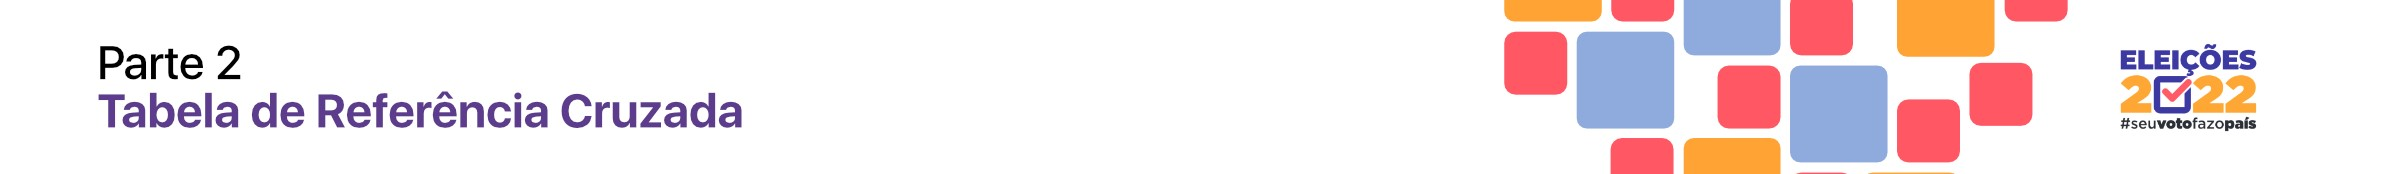

In [7]:
# Tabela de Referência Cruzada, com a quantidade de votos válidos por Cargo e Município:
tabela_cruzada = pd.crosstab(eleicao['NM_MUNICIPIO'], eleicao['DS_CARGO'], values=eleicao['QT_TOTAL_VOTOS_VALIDOS'], aggfunc='sum', margins=True, margins_name='Total de Votos Válidos').reset_index()

# Para exibir um divisor de milhar em todos os valores numéricos da tabela:
tabela_cruzada = tabela_cruzada.applymap(lambda x: "{:,}".format(x).replace(',', '.')  if isinstance(x, (int, float)) else x)

# Visualização da tabela de referência cruzada:
tabela_cruzada.head(60)

DS_CARGO,NM_MUNICIPIO,Deputado Estadual,Deputado Federal,Governador,Senador,Total de Votos Válidos
0,ABREULÂNDIA,1.843,1.849,1.818,1.731,7.241
1,AGUIARNÓPOLIS,2.889,2.906,2.865,2.772,11.432
2,ALIANÇA DO TOCANTINS,3.208,3.208,3.164,3.037,12.617
3,ALMAS,3.879,3.941,3.839,3.690,15.349
4,ALVORADA,5.388,5.317,5.298,4.991,20.994
5,ANANÁS,5.513,5.538,5.427,5.180,21.658
6,ANGICO,2.064,2.055,2.001,1.926,8.046
7,APARECIDA DO RIO NEGRO,3.207,3.212,3.162,2.980,12.561
8,ARAGOMINAS,3.450,3.541,3.484,3.306,13.781
9,ARAGUACEMA,3.509,3.571,3.482,3.371,13.933


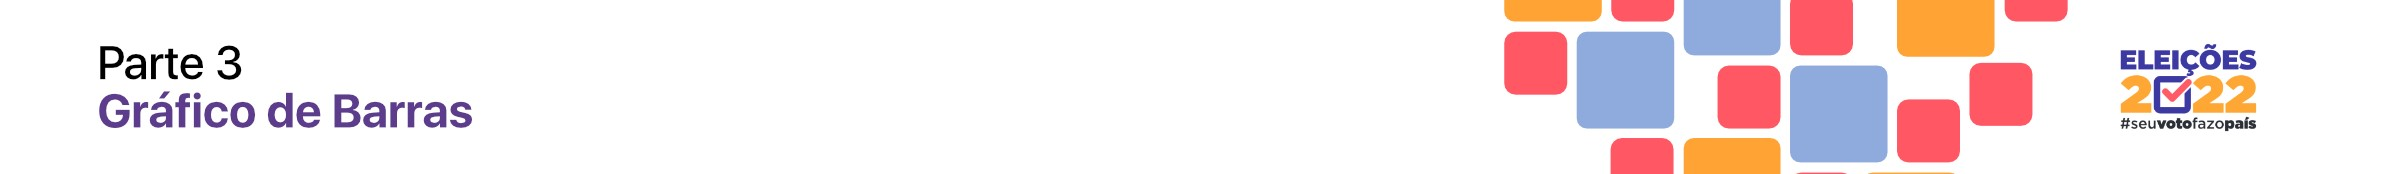

In [8]:
# Somar a quantidade de votos válidos por Partido:
tabela_partidos = eleicao.groupby(['SG_PARTIDO'])['QT_TOTAL_VOTOS_VALIDOS'].sum().reset_index()

# Gráfico de barras com a quantidade de votos válidos por Partido:
fig = px.bar(tabela_partidos, x='SG_PARTIDO', y='QT_TOTAL_VOTOS_VALIDOS', title='Total de Votos Válidos por Partido Político - Tocantins (TO)', labels={'SG_PARTIDO': 'Partido', 'QT_TOTAL_VOTOS_VALIDOS': 'Quantidade de Votos Válidos'})
# Ordenar os valores do eixo X em ordem decrescente:
fig.update_xaxes(categoryorder='total descending')

fig.show()

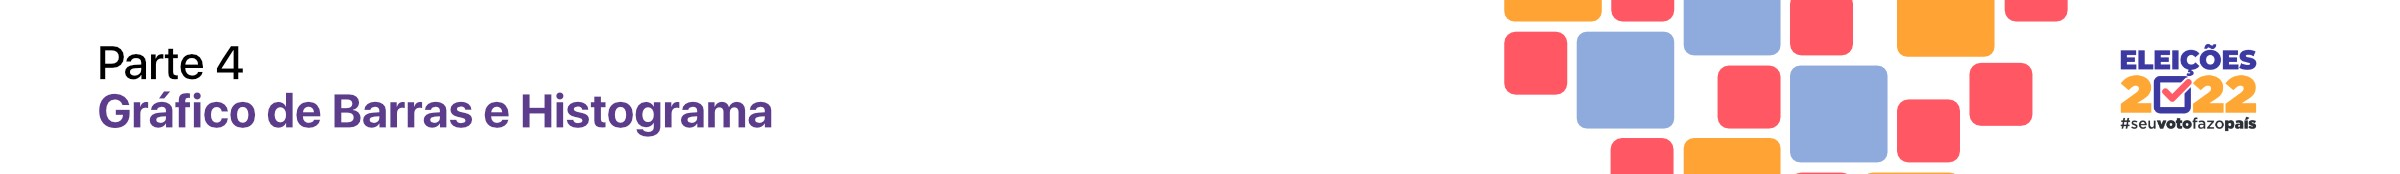

In [9]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Cria um subplot com duas colunas e uma linha
fig = make_subplots(rows=1, cols=2)

# Adiciona o gráfico de barras na primeira coluna
fig.add_trace(
    go.Bar(x=tabela_partidos['SG_PARTIDO'], y=tabela_partidos['QT_TOTAL_VOTOS_VALIDOS'], 
           name='Total de Votos Válidos por Partido Político - Tocantins (TO)'),
    row=1, col=1
)

# Adiciona o histograma na segunda coluna
fig.add_trace(
    go.Histogram(x=eleicao['QT_TOTAL_VOTOS_VALIDOS'], 
                 name='Frequência do Total de Votos Válidos - Tocantins (TO)'),
    row=1, col=2
)

# Atualiza o layout do subplot
fig.update_layout(title='Total de Votos Válidos por Partido Político - Tocantins (TO)')
fig.update_xaxes(categoryorder='total descending')

# Mostra o subplot
fig.show()

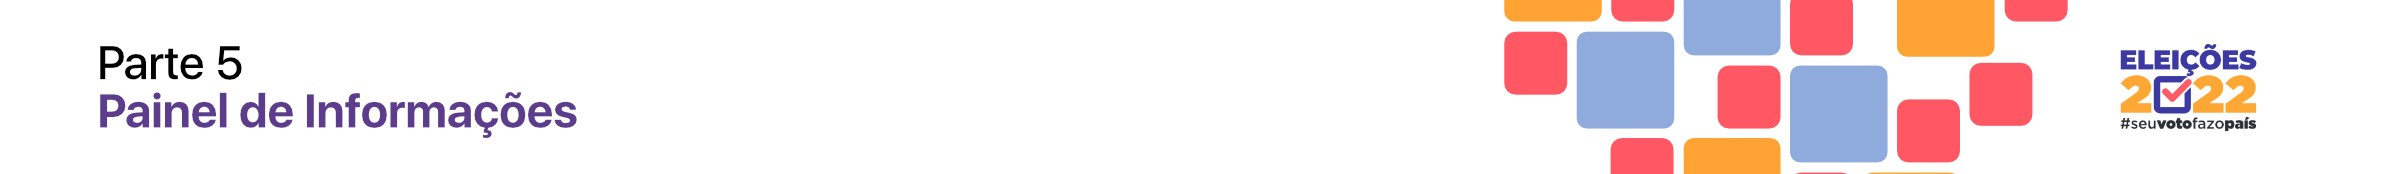

In [11]:
# Para abrir o dashboard interativo, execute esta célula e abra o endereço http://127.0.0.1:8050/ no seu navegador web.

import dash
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd



# CRIAÇÃO DO DASH ######################################################################################

app = dash.Dash(
    __name__,
    meta_tags=[{"name": "viewport", "content": "width=device-width, initial-scale=1"}],
)
app.title = "Eleições 2022 - Tocantins"

server = app.server
app.config.suppress_callback_exceptions = True



# ÁREA DE GRÁFICOS E TABELAS ###########################################################################

# Gráfico de barras com a quantidade de votos válidos por Partido:
fig = px.bar(tabela_partidos, x='SG_PARTIDO', y='QT_TOTAL_VOTOS_VALIDOS', title='Total de Votos Válidos por Partido Político - Tocantins (TO)', labels={'SG_PARTIDO': 'Partido', 'QT_TOTAL_VOTOS_VALIDOS': 'Quantidade de Votos Válidos'})
fig.update_xaxes(categoryorder='total descending')

# Histograma com a quantidade de votos válidos:
fig2 = px.histogram(eleicao, x='QT_TOTAL_VOTOS_VALIDOS', title='Histograma de Votos Válidos - Tocantins (TO)', labels={'QT_TOTAL_VOTOS_VALIDOS': 'Quantidade de Votos Válidos'})

# Boxplot com a quantidade de votos válidos
fig3 = px.box(eleicao, x='QT_TOTAL_VOTOS_VALIDOS', title='Boxplot de Votos Válidos - Tocantins (TO)', labels={'QT_TOTAL_VOTOS_VALIDOS': 'Quantidade de Votos Válidos'})

# Gráfico de pizza frequencia DS_CARGO
fig4 = px.pie(eleicao, names='DS_CARGO', title='Frequência de Cargos - Tocantins (TO)')



# ÁREA DE LAYOUT #######################################################################################

app.layout = html.Header(
     style={
        'padding-left': '10%',  # Define o padding esquerdo
        'padding-right': '10%',  # Define o padding direito
        'margin-top': '40px',  # Define a margem superior
        'font-family': 'Inter, Segoe UI, sans-serif',  # Defina a fonte desejada
    },
    
    # Define o cabeçalho da página, com os títulos e a marca do TSE
    children=[
        html.Div(
            style = {
                'display': 'flex', 
                'justify-content': 'flex-end'
                },
            children=[
                html.Img(
                    src='https://www.tse.jus.br/imagens/imagens/tse-logo-eleicoes-2022/@@images/7565a094-efc8-4584-bc71-fece26a00d72.jpeg',
                    style={'max-width': '120px', 'max-height': '120px'}
                )
            ]
        ),
    
    html.H1(children='Eleições 2022'),
    html.H2(children='Estado do Tocantins (TO)', style={'color': '#3d39a2'}
            
    ),

    # Texto de instrução
    html.Div(
        id='texto',
        style={'margin-top': '50px', 'margin-bottom': '10px'},  # Defina as margens desejadas
        children='Escolha um Cargo para visualizar os dados:'
    ),

    # Dropdown com as opções de cargo
    html.Div(id='dropdown_cargo'),
    dcc.Dropdown(
        id='cargo_dropdown',
        style={'width': '250px', 'margin-top': '10px', 'margin-bottom': '20px'},
        options=cargos,
        value='Todos os Cargos'
    ),

    # Gráficos
    html.Div([
        dcc.Graph(id='total_votos_partido', style={'width': '100%', 'height': '100%'}),
        dcc.Graph(id='histograma',style={'width': '100%', 'height': '100%'}),
    ], style={'display': 'flex', 'flex-direction': 'row', 'justify-content': 'space-between', 'margin-top': '50px', 'margin-bottom': '20px'}),

    html.Div([
        dcc.Graph(id='boxplot', style={'width': '100%', 'height': '100%'}),
        dcc.Graph(id='frequencia_cargo', style={'width': '100%', 'height': '100%'}),    
    ], style={'display': 'flex', 'flex-direction': 'row', 'justify-content': 'space-between', 'margin-top': '0px', 'margin-bottom': '20px'}),

])



# ÁREA DE CALLBACKS ######################################################################################
# Os callbacks são funções que atualizam os gráficos e tabelas de acordo com as interações do usuário.

# Callback do Dropdown de Cargos:
@app.callback(
    [Output('total_votos_partido', 'figure'), Output('histograma', 'figure'), Output('boxplot', 'figure'), Output('frequencia_cargo', 'figure')],
    Input('cargo_dropdown', 'value'),
)

# Função que atualiza os gráficos e tabelas de acordo com o valor selecionado no Dropdown de Cargos:
def update_output(value):
    if value == 'Todos os Cargos':
        fig1 = px.bar(tabela_partidos, x='SG_PARTIDO', y='QT_TOTAL_VOTOS_VALIDOS', title='Total de Votos Válidos por Partido Político - Tocantins (TO)', labels={'SG_PARTIDO': 'Partido', 'QT_TOTAL_VOTOS_VALIDOS': 'Quantidade de Votos Válidos'})
        fig1.update_xaxes(categoryorder='total descending')

        fig2 = px.histogram(eleicao, x='QT_TOTAL_VOTOS_VALIDOS', title='Histograma de Votos Válidos - Tocantins (TO)', labels={'QT_TOTAL_VOTOS_VALIDOS': 'Quantidade de Votos Válidos'})

        fig3 = px.box(eleicao, x='QT_TOTAL_VOTOS_VALIDOS', title='Boxplot de Votos Válidos - Tocantins (TO)', labels={'QT_TOTAL_VOTOS_VALIDOS': 'Quantidade de Votos Válidos'})

        fig4 = px.pie(eleicao, names='DS_CARGO', title='Frequência de Candidados por Cargo - Tocantins (TO)')

    else:
        value = value
        tabela_partidos_cargo = eleicao[eleicao['DS_CARGO'] == value].groupby(['SG_PARTIDO'])['QT_TOTAL_VOTOS_VALIDOS'].sum().reset_index()

        fig1 = px.bar(tabela_partidos_cargo, x='SG_PARTIDO', y='QT_TOTAL_VOTOS_VALIDOS', title='Total de Votos Válidos por Partido Político - Tocantins (TO)', labels={'SG_PARTIDO': 'Partido', 'QT_TOTAL_VOTOS_VALIDOS': 'Quantidade de Votos Válidos'})
        fig1.update_xaxes(categoryorder='total descending')

        fig2 = px.histogram(eleicao[eleicao['DS_CARGO'] == value], x='QT_TOTAL_VOTOS_VALIDOS', title='Histograma de Votos Válidos - Tocantins (TO)', labels={'QT_TOTAL_VOTOS_VALIDOS': 'Quantidade de Votos Válidos'})

        fig3 = px.box(eleicao[eleicao['DS_CARGO'] == value], x='QT_TOTAL_VOTOS_VALIDOS', title='Boxplot de Votos Válidos - Tocantins (TO)', labels={'QT_TOTAL_VOTOS_VALIDOS': 'Quantidade de Votos Válidos'})

        fig4 = px.pie(eleicao, names='DS_CARGO', title='Frequência de Candidados por Cargo - Tocantins (TO)')

    return fig1, fig2, fig3, fig4


# Execução do app
if __name__ == '__main__':
    app.run_server(debug=False)


# Para encerrar a execução do app, pare a execução desta célula e feche a aba do navegador.

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [12/Jun/2023 08:20:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Jun/2023 08:20:59] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Jun/2023 08:20:59] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Jun/2023 08:20:59] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [12/Jun/2023 08:20:59] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [12/Jun/2023 08:20:59] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [12/Jun/2023 08:21:00] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Jun/2023 08:22:45] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Jun/2023 08:22:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Jun/2023 08:23:08] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Jun/2023 08:23:13] "POST /_dash-update-component HTTP/1.1" 